In [1]:

import numpy as np
import torch
from matplotlib import pyplot as plt
from torch import nn
from torchvision import utils

from utils import ml_utils
from utils import models
from utils.data_loading import initialize_env
from utils.data_loading import load_fashion_mnist, load_mnist


In [2]:
initialize_env()
device = "cuda" if torch.cuda.is_available() else "cpu"

## Looking at the data
Lets have a first look as to what the data looks like that we're dealing with

In [3]:
def output_label(label):
    output_mapping = {
        0: "T-shirt/Top",
        1: "Trouser",
        2: "Pullover",
        3: "Dress",
        4: "Coat",
        5: "Sandal",
        6: "Shirt",
        7: "Sneaker",
        8: "Bag",
        9: "Ankle Boot"
    }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([10, 1, 28, 28]) torch.Size([10])
labels:  Sandal, Sneaker, Coat, Sneaker, Dress, Bag, Ankle Boot, Sandal, Dress, Trouser, 

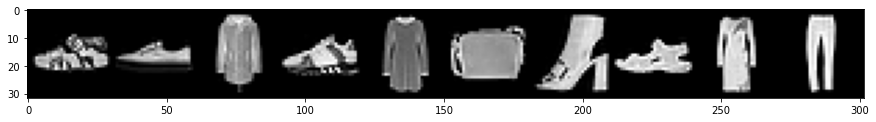

In [4]:
demo_loader, _ = load_fashion_mnist(batch_size=10)

batch = next(iter(demo_loader))
images, labels = batch
print(type(images), type(labels))
print(images.shape, labels.shape)
grid = utils.make_grid(images, nrow=10)

plt.figure(figsize=(15, 20))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print("labels: ", end=" ")
for i, label in enumerate(labels):
    print(output_label(label), end=", ")

## Different batchsizes at fixed learning rate

Epoch= 1,	 batch = 0,	 cost = 2.3019,	 accuracy = 0.125
Epoch= 1,	 batch = 200,	 cost = 1.7632,	 accuracy = 0.71875
Epoch= 1,	 batch = 400,	 cost = 1.7934,	 accuracy = 0.65625
Epoch= 1,	 batch = 600,	 cost = 1.6690,	 accuracy = 0.78125
Epoch= 1,	 batch = 800,	 cost = 1.7425,	 accuracy = 0.71875
Epoch= 1,	 batch = 1000,	 cost = 1.6288,	 accuracy = 0.84375
Epoch= 1,	 batch = 1200,	 cost = 1.6592,	 accuracy = 0.8125
Epoch= 1,	 batch = 1400,	 cost = 1.5892,	 accuracy = 0.875
Epoch= 1,	 batch = 1600,	 cost = 1.7698,	 accuracy = 0.6875
Epoch= 1,	 batch = 1800,	 cost = 1.7951,	 accuracy = 0.65625
[Epoch:    1], averaged cost = 1.72628129
Epoch= 2,	 batch = 0,	 cost = 1.8643,	 accuracy = 0.5625
Epoch= 2,	 batch = 200,	 cost = 1.5560,	 accuracy = 0.90625
Epoch= 2,	 batch = 400,	 cost = 1.6517,	 accuracy = 0.8125
Epoch= 2,	 batch = 600,	 cost = 1.7426,	 accuracy = 0.71875
Epoch= 2,	 batch = 800,	 cost = 1.5939,	 accuracy = 0.84375
Epoch= 2,	 batch = 1000,	 cost = 1.6895,	 accuracy = 0.78125
Epoc

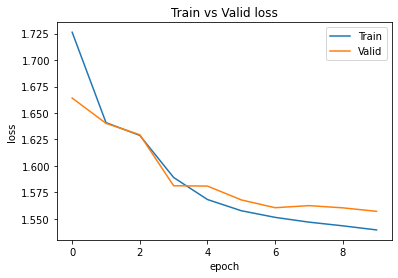

Epoch= 1,	 batch = 0,	 cost = 2.3025,	 accuracy = 0.109375
Epoch= 1,	 batch = 200,	 cost = 1.7939,	 accuracy = 0.65625


KeyboardInterrupt: 

In [5]:
models_dict = {}
batch_sizes = [32, 64, 128, 256, 512, 1024]
lr = 0.001

for batch_size in batch_sizes:
    models_dict[batch_size] = {}
    train_dataloader, test_dataloader = load_fashion_mnist(batch_size=batch_size)
    model = models.MnistCnn()

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(params=model.parameters(), lr=lr)
    training_epochs = 10

    results_dict = ml_utils.train(train_dataloader, test_dataloader, batch_size, model, optimizer, criterion, lr,
                                        training_epochs, device)
    models_dict[batch_size]["results"] = results_dict

    print(results_dict["test_loss"])
    plt.plot(results_dict["train_loss"], "-o")
    plt.plot(results_dict["test_loss"], "-o")
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Train', 'Valid'])
    plt.title('Train vs Valid loss')
    plt.show()

In [ ]:
    print(results_dict)
    # plt.plot(results_dict["train_loss"])
    # plt.plot(results_dict["test_loss"])
    # plt.xlabel('epoch')
    # plt.ylabel('loss')
    # plt.legend(['Train', 'Valid'])
    # plt.title('Train vs Valid loss')
    # plt.show()

## Different batchsizes with linear learning rate
Up the learning rate linearly according to the batch size.

In [ ]:
models_dict = {}
batch_sizes = [32, 64, 128, 256, 512, 1024]
learning_rates = [0.001, 0.002, 0.004, 0.008, 0.016, 0.032]

for (batch_size, lr) in zip(batch_sizes, learning_rates):
    models_dict[batch_size] = {}
    train_dataloader, test_dataloader = load_fashion_mnist(batch_size=batch_size)
    model = models.MnistCnn()

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(params=model.parameters(), lr=lr)
    training_epochs = 10

    train_results_dict = ml_utils.train(train_dataloader, batch_size, model, optimizer, criterion, lr,
                                        training_epochs, device)
    models_dict[batch_size][lr] = train_results_dict
    plt.plot(train_results_dict["train_loss"])
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['Train', 'Valid'])
    plt.title('Train vs Valid Accuracy')
    plt.show()